In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import math
import scipy as sp
import copy

%matplotlib notebook
%matplotlib inline

## 1. Numerical integration

### (a) Find analytical solutions for the voltage as a function of time

Start with solving the voltage trace in a RC circuit (where C is the membrane copacitance and the leaky term for ion channels).

$\frac{dV}{dt}=[I-g_{L}(V-V_{L})]/C$

$\int\frac{dV}{I-g_{L}(V-V_{L})}=\int\frac{dt}{C}$

$ln(I-g_{L}(V-V_{L}))=\frac{-g_{L}}{C}t+constant$

$I-g_{L}(V-V_{L})=Ae^{\frac{-g_{L}}{C}t}$, where A is determined by initial conditions

$V(t)=I-Ae^{-t}$, since $g_{L}=1, V_{L}=0, C=1$


for $V(0)=1$, $I=0$

$\Rightarrow V(t) = I+e^{-t}$

a qualitative discription is that the voltage drops to I=0 from V(0)=1 exponentially. Let's plot the solution:

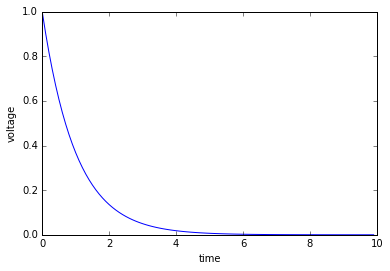

In [2]:
#V(0)=1,I=0
dt = 0.1
t = np.arange(0,10,dt)
I = 0
vt = I + np.exp(-t)
plt.plot(t,vt)
plt.xlabel('time')
plt.ylabel('voltage')

for $V(0)=0$, $I=1$

$\Rightarrow V(t) = I-e^{-t}$

a qualitative discription is that the voltage grows to I=1 from V(0)=0 exponentially.

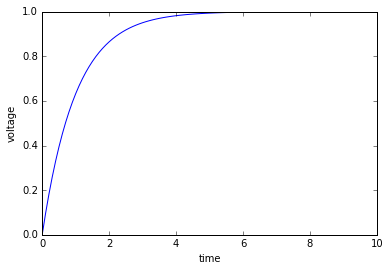

In [3]:
#V(0)=0,I=1
I = 1
vt = I - np.exp(-t)
plt.plot(t,vt)
plt.xlabel('time')
plt.ylabel('voltage')

### (b) Lyapunov function

$Lyapunov$ $function$ $L=\frac{1}{2}V^{2}$

$=(I \pm e^{-t})^{2} = e^{-2t}$, since $I=0$

$\frac{dL}{dt}=-2e^{-2t}<0$, for any positive number in time $t$ 

$\implies \frac{dL}{dt}<0$, $L$ decreases throught time

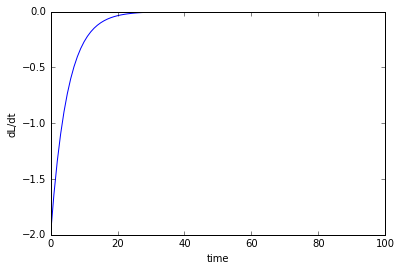

In [4]:
#change of L through time
dldt = -2*np.exp(-2*t)
plt.plot(dldt)
plt.xlabel('time')
plt.ylabel('dL/dt')

Yes, $\implies \frac{dL}{dt} \leq 0$, and it is close to 0 when $t\to\infty$

### (c) Now let’s solve dV/dt = −V numerically

In [5]:
def dVdt(t,dt,V0):
    '''
    dV/dt=-V simulation and the corresponding Lyaponuv function calculated. The function receives a the vector of time
    (to determine the length of simulation), dt time steps, and the initial condition V(0)=V0
    
    The returned values are voltage trace V and function L=1/2*V^2
    '''
    V = np.zeros(len(t))
    L = np.zeros(len(t))
    V[0] = V0
    L[0] = 1/2*V[0]**2
    for i in range(1,len(V)):
        V[i] = V[i-1] - V[i-1]*dt
        L[i] = 0.5*V[i]**2#L[i-1] - 2*np.exp(-2*i)
    return V, L

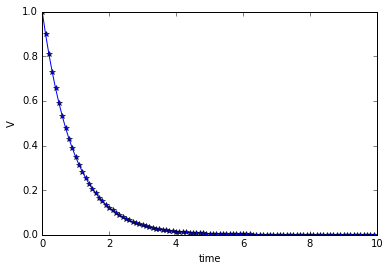

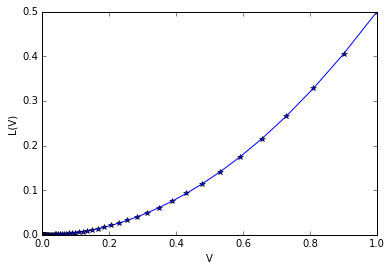

In [6]:
#with dt<1
dt = 0.1
t = np.arange(0,10,dt)
V0 = 1
V, L = dVdt(t,dt,V0)
plt.plot(t,V,'-*')
plt.xlabel('time')
plt.ylabel('V')
plt.figure()
plt.plot(V,L,'-*')
plt.xlabel('V')
plt.ylabel('L(V)')

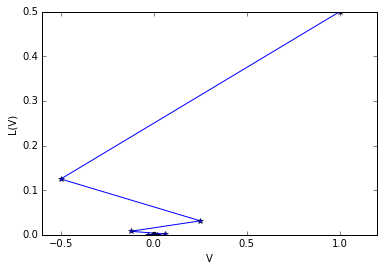

In [7]:
#with dt>1
dt = 1.5
V0 = 1
V, L = dVdt(t,dt,V0)
plt.plot(V,L,'-*')
plt.xlabel('V')
plt.ylabel('L(V)')

No, the function $L$ dose not always go downhill monotonically. According to the last two cells, when the time steps for Eular integration $dt>1$, values of $L(V)$ jitter back and forth. Time steps $dt$ has to be small enough to produce stable and smooth trajectories in the phase plane.

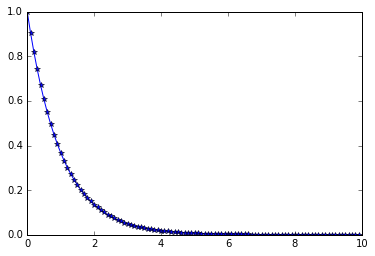

In [8]:
#higher-order approximation for numerical OSE solution
from scipy.integrate import odeint
def f(vv,t):
    return -vv  #dv/dt=-v
sol = odeint(f, V0, t)
plt.plot(t,sol,'-*')

Nice, so the Eular approximation has similar behavior to the high-order methods, showing the same time scale for voltage decay.

## 2. The Hodgkin/Huxley equations for the space clamped membrane

### (a) Use Matlab to numerically integrate the Hodgkin/Huxley equations

In [41]:
#parameters
gN = 120 #mmho/cm2
gK = 36 #mmho/cm2
gL = 0.3 #mmho/cm2
VN = 50 #mV
VK = -77 #mV
VL = -54.4 #mV
C = 1 #μF/cm2

In [42]:
#initials
dt = 0.01
t = np.arange(0,50,dt)
I = np.zeros(len(t))#+20 #20
V = np.zeros(len(t))
V[0] = -65 #initialize near resting potential (this could be determined by running it with random inital conditions)
n = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))

In [43]:
#iteration
for i in range(1,len(t)):
    V[i] = V[i-1] + dt*(I[i] - gN*m[i-1]**3*h[i-1]*(V[i-1]-VN) - gK*n[i-1]**4*(V[i-1]-VK) - gL*(V[i-1]-VL))/C
    n[i] = n[i-1] + dt*((1-n[i-1])*(0.01*(V[i-1]+55)/(1-np.exp(-(V[i-1]+55)/10))) - n[i-1]*(0.125*np.exp(-(V[i-1]+65)/80)))
    m[i] = m[i-1] + dt*((1-m[i-1])*(0.1*(V[i-1]+40)/(1-np.exp(-(V[i-1]+40)/10))) - m[i-1]*(4*np.exp(-(V[i-1]+65)/18)))
    h[i] = h[i-1] + dt*((1-h[i-1])*(0.07*np.exp(-(V[i-1]+65)/20)) - h[i-1]*(1/(1+np.exp(-(V[i-1]+35)/10))))

-65.0024670336


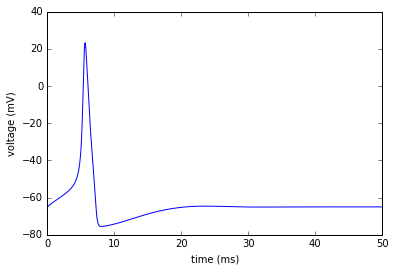

In [48]:
plt.plot(t,V)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)') 
print(V[-1])

0.317651973797 0.0529160290313 0.595396799482


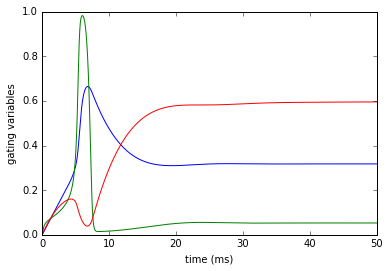

In [47]:
plt.plot(t,n,label='n')
plt.plot(t,m,label='m')
plt.plot(t,h,label='h')
plt.xlabel('time (ms)')
plt.ylabel('gating variables') 
print(n[-1],m[-1],h[-1])

Got a beutiful action potential! :) We know how these varaibles change as a spike forms, and more inportantly numerically obtained the steady-state solution when there is no input $I$. These solutions are reasonable initial condition for the following simulations.

By the way, for future usage, let's make it into a function~

In [76]:
def HHmodel(duration, dt, I, gN=120, gK=36):
    '''
    HHmodel function recieves input "duration" for the total simulation duration (in ms unit) and dt as the time steps.
    I is a vector with the same length as np.arange(0,duration,dt) that is input current through time.
    
    The retuned value is V, the vector that contains voltage from HHmodel throught time.
    Note that all the coefficients of H-H model follow those show in the work sheet. Validity check can be performed
    by editing parameters such as conductances outside the function or coefficients in the function.
    (remember to change it back if editted!)
    '''
    #gN = 120 #mmho/cm2
    #gK = 36 #mmho/cm2
    gL = 0.3 #mmho/cm2
    VN = 50 #mV
    VK = -77 #mV
    VL = -54.4 #mV
    C = 1 #μF/cm2

    dt = dt
    t = np.arange(0,duration,dt)
    V = np.zeros(len(t))
    V[0] = -65 #initialize at resting potential
    n = np.zeros(len(t)) #set initial condition to our steady-state values
    n[0] = 0.32
    m = np.zeros(len(t))
    m[0] = 0.05
    h = np.zeros(len(t))
    h[0] = 0.59
    #iteration
    for i in range(1,len(t)):
        V[i] = V[i-1] + dt*(I[i] - gN*m[i-1]**3*h[i-1]*(V[i-1]-VN) - gK*n[i-1]**4*(V[i-1]-VK) - gL*(V[i-1]-VL))/C
        n[i] = n[i-1] + dt*((1-n[i-1])*(0.01*(V[i-1]+55)/(1-np.exp(-(V[i-1]+55)/10))) - n[i-1]*(0.125*np.exp(-(V[i-1]+65)/80)))
        m[i] = m[i-1] + dt*((1-m[i-1])*(0.1*(V[i-1]+40)/(1-np.exp(-(V[i-1]+40)/10))) - m[i-1]*(4*np.exp(-(V[i-1]+65)/18)))
        h[i] = h[i-1] + dt*((1-h[i-1])*(0.07*np.exp(-(V[i-1]+65)/20)) - h[i-1]*(1/(1+np.exp(-(V[i-1]+35)/10))))
    return V

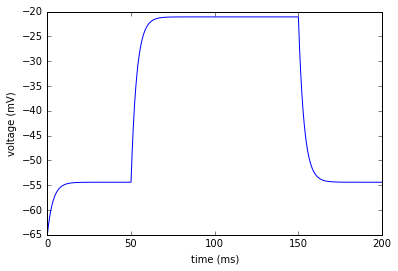

In [77]:
#validity check
dt = 0.01
duration = 200
time = np.arange(0,duration,dt)
st = np.where(time>50)[0][0]
en = np.where(time<150)[0][-1]
I = np.zeros(int(duration/dt))
I[st:en] = 10
vv0 = HHmodel(duration,dt,I, gN=0, gK=0)
plt.plot(time,vv0)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)') 

Yes, when setting $g_{Na}$ and $g_{K}$ to zero, the behavior of the neruon is like a passive RC circuit, as we have simulated in problem (1a).

Now the steady-state solution is determined by $g_{L}, V_{L}$, and input $I$ and $C$.

Remember the analytic solution from (1a): $I-g_{L}(V-V_{L})=Ae^{\frac{-g_{L}}{C}t}$, where A is determined by initial conditions. It's clearer like after organizing it:

$V(t) = \frac{I}{g_{L}}+V_{L}-Ae^{-\frac{g_{L}}{c}t}$

Time to solve this step by step. We can solve how it responses to the onset of the step (at t=50 ms) and also the termination of the step (at t=150 ms):

-At t=0:

$V(0)=-65=V_{r}$, for starting from the resting potential $\implies$ $A=\frac{I}{g_{L}}+V_{L}-V_{r}$ $\implies$ $V(t) = \frac{I}{g_{L}}+V_{L}-(\frac{I}{g_{L}}+V_{L}-V_{r})e^{-\frac{g_{L}}{c}t}$

0.999949825318


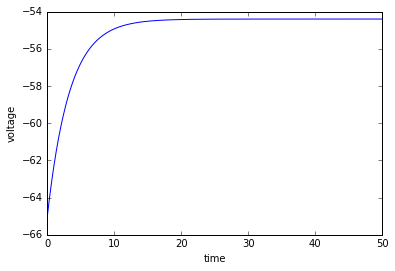

In [15]:
dt = 0.01
t = np.arange(0,50,dt)
I = 0
Vr = -65
vt0 = I/gL + VL - (I/gL+VL-Vr)*np.exp(-gL/C*t)
plt.plot(t,vt0)
plt.xlabel('time')
plt.ylabel('voltage')
print(vt[-1])

-At t=50:

$V(0)=V_{L}$, for starting from the resting potential $\implies$ $A=\frac{I}{g_{L}}$ $\implies$ $V(t) = \frac{I}{g_{L}}+V_{L}-\frac{I}{g_{L}}e^{-\frac{g_{L}}{c}t}$

0.999949825318


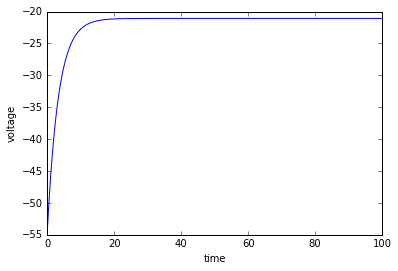

In [16]:
dt = 0.01
t = np.arange(0,100,dt)
I = 10
vt1 = I/gL + VL - I/gL*np.exp(-gL/C*t)
plt.plot(t,vt1)
plt.xlabel('time')
plt.ylabel('voltage')
print(vt[-1])

-At t=150:

$V(0)\approx -21.07$ (let's call it $V_{\infty}$), as shown above at the steady-state after 100 ms of stimuli. $A = \frac{I}{g_{L}}+V_{L}-V_{\infty}$$\implies$ $V(t) = \frac{I}{g_{L}}+V_{L}-(I+V_{L}-V_{\infty})e^{-\frac{g_{L}}{c}t}$, where $I=0$ at this phase since it's turned off after $t=150 ms$.

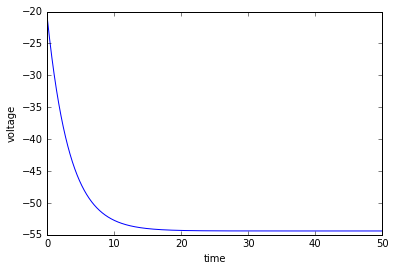

In [17]:
Vinf = -21.07 #vt[-1] from the last question
dt = 0.01
t = np.arange(0,50,dt)
I = 0
vt2 = I/gL + VL - (I/gL+VL-Vinf)*np.exp(-gL/C*t)
plt.plot(t,vt2)
plt.xlabel('time')
plt.ylabel('voltage')

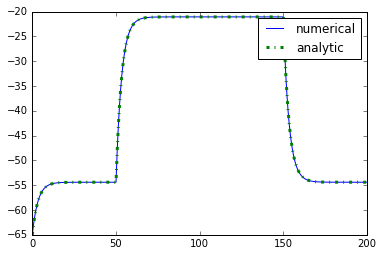

In [18]:
#overlapping the plot from analytic and numerical results
ana_v = np.concatenate((vt0,vt1,vt2), axis=0)  #concatenate the piecwiase functions from the last three cells
plt.plot(time,vv0,label='numerical')
plt.hold(True)
plt.plot(time,ana_v,'-.',linewidth=3 ,label='analytic') #green dash the overlaps on the blue trace
plt.legend()

So yes, the analytic solution matches the numerical result when $g_{K}=0, g_{Na}=0$. They behave like RC circuits to the step function, increasing and decreasing exponentially with the time scale $\frac{1}{g_{L}/C}=RC=\tau$ in the circuit notions.

With the same logic, other ways for validity check include removing the dynamics of variable $m, n, h$ (fixed opend, for instnace) and see if the voltage decays passively and dragged by the corresponding leaking ion reverse potential. One should also check if the resting potential meets the emperical value when no input $I$ is applied. Here we see that the voltage drags from the initial condition (since there are always still numerical differences in initial conditions for m, n, h values) and quickly rests near $-65 mV$, which is a reasonable emperical resting potential for HH model and squid axons.


resting potential is: -64.9997224337 mV


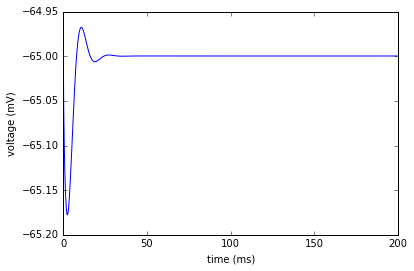

In [78]:
#validity check 2 (resting potential)
dt = 0.01
duration = 200
time = np.arange(0,duration,dt)
I = np.zeros(len(time))
vv02 = HHmodel(duration,dt,I)
plt.plot(time,vv02)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
print('resting potential is:', vv02[-1], 'mV')

Other possible validation may not relate to analytic solutions but other observed physiological phenomena. One can try out rebound spikes after hyperpolarization (showing that not only $V$ but also change $\frac{dV}{dt}$) effects spiking behavior. Another candidate is to "block" single channels and look for bistable states or emparically known phenomena. Here we keep parameter $h$ at 1 so that it dose not inactivate $g_{Na}$, and we see that the refractory period is gone and even falls to an alternative stable solution (that is higher due to the drag from reversal potential of sodium). One can compare this to experiment and our previous simulations.

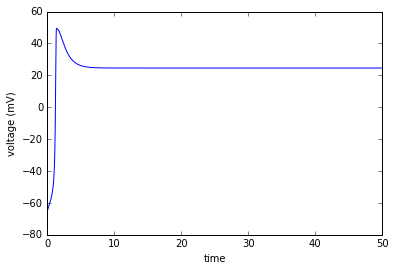

In [90]:
# validity check3 (holding h and bistability)
for i in range(1,len(t)):
    V[i] = V[i-1] + dt*(I[i] - gN*m[i-1]**3*h[i-1]*(V[i-1]-VN) - gK*n[i-1]**4*(V[i-1]-VK) - gL*(V[i-1]-VL))/C
    n[i] = n[i-1] + dt*((1-n[i-1])*(0.01*(V[i-1]+55)/(1-np.exp(-(V[i-1]+55)/10))) - n[i-1]*(0.125*np.exp(-(V[i-1]+65)/80)))
    m[i] = m[i-1] + dt*((1-m[i-1])*(0.1*(V[i-1]+40)/(1-np.exp(-(V[i-1]+40)/10))) - m[i-1]*(4*np.exp(-(V[i-1]+65)/18)))
    h[i] = 1#h[i-1] + dt*((1-h[i-1])*(0.07*np.exp(-(V[i-1]+65)/20)) - h[i-1]*(1/(1+np.exp(-(V[i-1]+35)/10))))
plt.plot(t,V)
plt.xlabel('time')
plt.ylabel('voltage (mV)')

### (b) Explore what happens to your solution as the time step size is increased

In [61]:
import numpy as np
from scipy.ndimage import measurements

def peak_finder(x0, thresh):
    '''
    A peak finding algorithm that considers neares possible points crossing a threshold.
    '''
    assert x0.ndim == 1
    clusters, ix = measurements.label(x0 > thresh)
    if ix==0:
        peak_loc = []
        peak_mag = []
    else:
        peak_loc = np.concatenate(measurements.maximum_position(x0, labels=clusters, index=np.arange(ix)+1))
        peak_mag = measurements.maximum(x0, labels=clusters, index=np.arange(ix)+1)
    return peak_loc, peak_mag

[  2.82  20.88  38.97  57.08  75.18  93.29]
[  2.88  20.76  38.58  56.4   74.28  92.1 ]


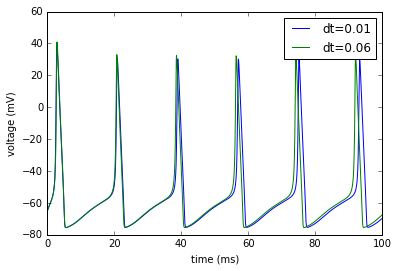

In [82]:
duration = 100
thr = 0

dt1 = 0.01
time1 = np.arange(0,duration,dt)
I1 = np.zeros(len(time1))+6.5
vv1 = HHmodel(duration,dt1,I1)
peak_loc, peak_mag = peak_finder(vv1, thr)
print(time[peak_loc])

dt2 = 0.06
time2 = np.arange(0,duration,dt2)
I2 = np.zeros(len(time2))+6.5
vv2 = HHmodel(duration,dt2,I2)
peak_loc, peak_mag = peak_finder(vv2, thr)
print(time2[peak_loc])

plt.plot(time1,vv1,label='dt=0.01')
plt.hold(True)
plt.plot(time2,vv2,label='dt=0.06')
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)') 
plt.legend()

Notice that while the spike number is the same in this time window,  the difference of spike times (as printed) increases as the simulation goes on.

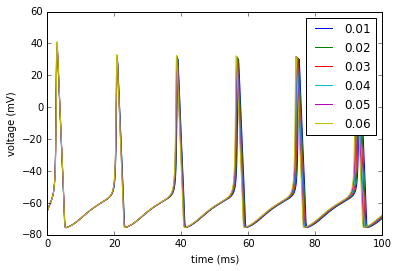

In [83]:
#more systematically scan of dt
duration = 100

dts = np.arange(0.01,0.07,0.01)
for i in range(0,len(dts)):
    dt_n = dts[i]
    time_n = np.arange(0,duration,dt_n)
    In = np.zeros(len(time_n))+6.5
    vv_n = HHmodel(duration,dt_n,In)
    peak_loc, peak_mag = peak_finder(vv_n, thr)

    plt.plot(time_n,vv_n,label=dt_n)
    plt.hold(True)
    
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)') 
plt.legend()

Similar to the lesson from problem (1c), time steps $dt$ in numerical ODE affects the result significantly. Here, the timming of spikes shifts forwards as the time steps increase. This is important since the dynamic systems ODE actually is in continuous time but we simulate in discrete small time steps. Also, Eular methods is locally linearizing and extrapolating the values with these small time steps. Time steps that are too large give rise to significant error in this iteration.

### (c) Neurons are often characterized by their f/I curves

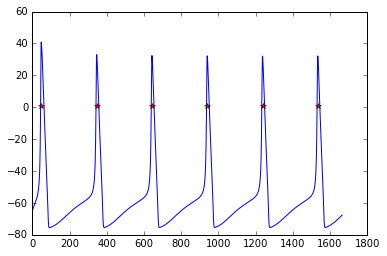

In [86]:
#Just a test and demo for spike detection again~
thr = 0

###alternative, less appropriate method~
#cross = np.where(vv<thr)[0]
#temp1 = copy.deepcopy(vv)
#temp1[cross] = 0
#temp2 = np.diff(temp1)
#spk = np.where(temp2>0.5)
#from scipy.signal import find_peaks_cwt
#ind = find_peaks_cwt(temp, np.arange(1, 1000))

peak_loc, peak_mag = peak_finder(vv_n, thr)
plt.plot(vv_n);
plt.hold(True)
plt.plot(peak_loc,np.ones(len(peak_loc)),'r*');

In [87]:
dt = 0.01
duration =200
time = np.arange(0,duration,dt)
st = np.where(time>50)[0][0]
en = np.where(time<150)[0][-1]
I = np.zeros(int(duration/dt))#np.random.rand(int(duration/dt))*30
Is = np.logspace(0,np.log(60)/np.log(10),20) #different input current from 0 to 60 μA/cm2, sample in log space
spks = np.zeros(len(Is))
for i in range(0,len(Is)):
    I[st:en] = Is[i]
    vv = HHmodel(duration,dt,I)
    peak_loc, peak_mag = peak_finder(vv, thr) #detect peaks
    if len(peak_loc)==1:
        spks[i] = 0
    else:
        spks[i] = len(peak_loc)  #np.mean(np.diff(time[peak_loc])) #mean of the inter-spike-intervals

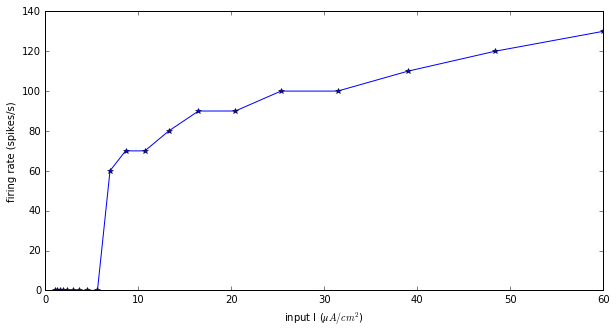

In [88]:
fig = plt.figure(1, figsize=[10,5])
plt.plot(Is,spks/(100/1000),'-*') #convert spike counts in 100ms to firing rate
#print(peak_loc)
plt.ylabel('firing rate (spikes/s)')
plt.xlabel('input I ($μA/cm^2$)') 

The $f-I$ curve is nonlinear, showing a threshold/rectification near $I\approx5 \mu A/cm^{2}$, where it jumps to 60 spikes/s, and  saturates when it grows to $~$120 spikes/s when the input is larger then 40 $\mu A/cm^{2}$. Note that I set the cutoff of input at 60 since the amplitude of spikes are below zero after incearsing input strength. There still are spike-like traces in the voltage that increases in frequency, but it dose not cross the threshold$=0 mV$ in our definition.

No, it is difficult to tune the firing rate to any arbitrary low value, since it saturates at large current input and also behaves highly nonlinear when the input is close to the threshold.

## 3. Robustness to biological changes in parameters

### (a) How robust is action potential generation in the Hodkin/Huxley model with changes in g ̄Na and g ̄K?

In [28]:
fig = plt.figure(1, figsize=[15,6])
dt = 0.01
duration =200
time = np.arange(0,duration,dt)
I = np.zeros(int(duration/dt))+6.5 #np.random.rand(int(duration/dt))*30
thr = 0

gN = 120
gK = 36
gNss = np.arange(-40,40,10) + 120
gKss = np.arange(-20,20,5) + 36
datas = np.zeros([len(gNss),len(gKss)])

gngk = np.arange(len(gNss)*len(gKss))
data2 = np.arange(len(gNss)*len(gKss))
k = 0
for i in range(0,len(gNss)):
    for j in range(0,len(gKss)):
        gNn = copy.deepcopy(gNss[i])
        gKn = copy.deepcopy(gKss[j])
        vv2 = HHmodel(duration,dt,I, gNn, gKn)
        peak_loc, peak_mag = peak_finder(vv2, thr) #detect peaks
        if len(peak_loc)==1:
            datas[i,j] = 0
            data2[k] = 0
        else:
            datas[i,j] = len(peak_loc)
            data2[k] = len(peak_loc)
        gngk[k] = gNn/gKn
        k = k+1

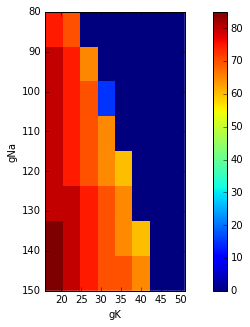

In [29]:
fig = plt.figure(1, figsize=[10,5])
plt.imshow(datas/(duration/1000), interpolation='none', extent=[gKss[0],gKss[-1],gNss[-1],gNss[0]])
plt.colorbar()
plt.ylabel('gNa')
plt.xlabel('gK') 

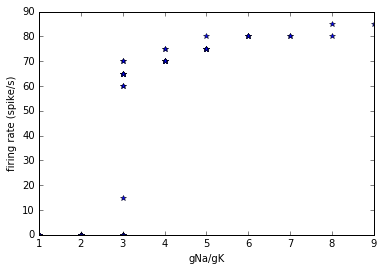

In [30]:
plt.plot(gngk,data2/(duration/1000),'*')
plt.xlabel('gNa/gK')
plt.ylabel('firing rate (spike/s)')

As shown above, I chose $8\times8$ sets of values to vary (both increase and decrease) $g_{Na}$ and $g_{K}$ parameters, with all other parameters fixed at the same input. The firing rate in the simulation duration was estimated by spike counts over time window, shown in colorcodes (spikes/s). The highest firing firing rate happens with high $g_{Na}$ and low $g_{K}$, which make sense since it causes strong depolarization and less delayed-rectification. 

Significantly, we realize that in some parameter spaces, the voltage traces dramatically turn into non-spiking behavior, showing how slightly tuning conductances can result in significant difference in firing patterns. More inportantly, we find that the firing rate are more robust along diagonal lines, reflecting the two parameters may affect the firing rate cooperatively. One might potentially fix the firing rate with different set of parameter combinations even though the system is still sensitive to certain change in a single parameter. 

One nice way to present these diagonal robustness in the parameter space is by calculating $\frac{g_{Na}}{g_{K}}$ values. In the second plot, we show that there is another "threshold" for this ratio to be firing robustly, aproxximate near $3-4$. This identifies the main scaling parameter for firing rate and supports the diagonal structure in the heatmap.

Some additional voltage taces is shown directly below (co-varying two parameters along an off-diagonal line), where all parameters produce similar spike counts (resulting in similar mean firing rate), but the temporal pattern may still vary significantly (this makes a lot difference if the system uses spike time coding strategies). Note that the difference increases through time, possibly showing an amplification of error that is common in nonlinear systems such as the neurons (gN and gK parameters and correlation coefficient for these five parameter sets of voltage traces are printed):

[array([100, 110, 120, 130, 140]), array([26, 31, 36, 41, 46])]


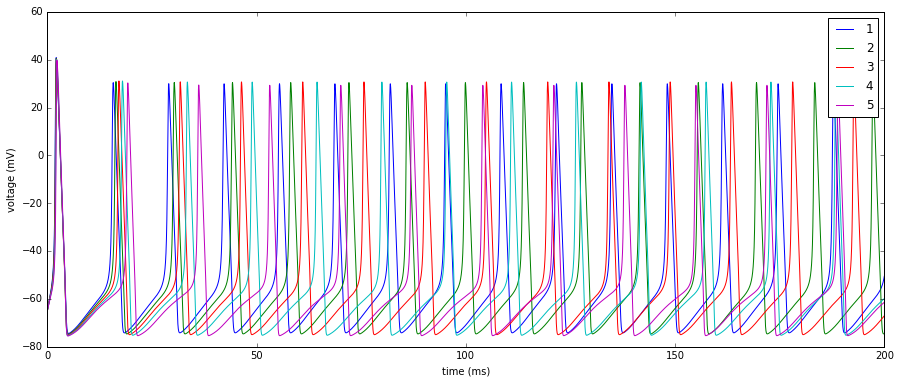

In [89]:
fig = plt.figure(1, figsize=[15,6])
I = np.zeros(int(duration/dt))+10 #np.random.rand(int(duration/dt))*30

gN = 120
gK = 36
gN_gK = [np.arange(-20,30,10)+120,np.arange(-10,15,5)+36]
print(gN_gK)
for i in range(0,len(gN_gK[0])):
    gNn = copy.deepcopy(gN_gK[0][i])
    gKn = copy.deepcopy(gN_gK[1][i])
    vv2 = HHmodel(duration,dt,I,gNn,gKn)
    plt.plot(time,vv2,label=i+1)
    plt.hold(True)
    plt.xlabel('time (ms)')
    plt.ylabel('voltage (mV)') 
    plt.legend()

### (b) How can a biological neuron deal with this situation?

A few points I thought of for general mechanisms to maintain robust firing patterns:

1. co-varying channel biophysics in larger parameter phase space.
2. activity-dependent feedback signaling as mentioned in the texts.
3. multiple chennel types and active maintainance of firing patterns.

1. As show in problem (3a), although altering one parameter may sensitively vary the firing pattern, the systems might still be able to maintain the robustness by co-tuning different other parameters to compensate the perturbed variable. In other words, given a certain firing rate as the activity we want to maintain, there are more then one set of $gNa$ and $gK$ combinations in the parameter state-space that can achieve it. This global structure of biophysical parameters is more error-robust and flexible for tunning. In fact, the result that optimal ratio of channels for firing patterns requires more $gNa$ than $gK$ might reflect the difference in kinetics. Since sodium channels have fast inactivation processes, the inward current is terminated in a short time sale. This might be why more sodium channels (large $gNa$) is require for default. On the other hand, potassium are relatively slow rectification after voltages sore up, the amounts required is therefore less thatn sodium since the current can continue longer in time.
-(Goldman, M. S., Golowasch, J., Marder, E., & Abbott, L. F. (2001). Global structure, robustness, and modulation of neuronal models. Journal of Neuroscience, 21(14), 5229-5238.)

2. Given the argument above, this implies that the feedback control/modulation might be state-dependent, meaning that it co-regulates different parameters together. This might be true if the modulator either wants to keep the firing pattern homeostatic (negative feedback for the the robustness we are discussing here) or change the neural codes dramatically (when signals really change, and it probably varies $g_{Na}$ and $g_{K}$ perpendicular to the "iso-firing rate" diagonals). Specifically, this feedback signal should come from an activity source, so that it informs the current firing pattern of the neuron. This leads to $Ca^{2+}$ mentioned in the text, which is a general intracellular signaling molecule found across cells and species. At the first order, one find that intracellular $[Ca^{2+}]$ increases as firing rate increases, due to voltage-dependent calcium channels such as L,T-tpyes, AMPA, and NMDA ionotropic receptors. So the concentration of $Ca^{2+}$ or cyclic-AMP can possibly be an indicator of activity state, and molecules that activate depending on its concentration would affect downstrean gene expression or protein processes (receptor/channel synthesis/degradation). One can imagine $Ca^{2+}$ dependent activation of calmodulin-dependent protein kinase II (CaMKII) further phosphorylate subunits of both $Na^{+}$ and $K^{+}$ channels, thereby regulating the number of channels transported to the membrane (perhaps decreasing gNa and increase gK when calcium is too high due to too much firing). This finishes a feedback-loop and possibly maintains robustness of spiking patterns. -(van Welie, Ingrid, and Sascha du Lac. "Bidirectional control of BK channel open probability by CAMKII and PKC in medial vestibular nucleus neurons." Journal of neurophysiology 105.4 (2011): 1651-1659.)

3. Time scale of these activity dependent channel expressions may be much longer than spiking activities. This is also why previous research compare the difference between knock-out channels and pharmacologically blocking channels $in$ $vivo$. The difference of outcome from these two treatments implies the compensatory mechanisms in long-term in the animals, and the goal of homeostasis for desired firing patterns. Moreover, the sub-types of channels are much abundance that sodium and potasium channels mentioned in here, so it is also possible that other channels that can effectively produce desired firing patterns. -(Marder, E., & Goaillard, J. M. (2006). Variability, compensation and homeostasis in neuron and network function. Nature Reviews Neuroscience, 7(7), 563-574.)